<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/optimization/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title **Imports** { display-mode: "form" }
import warnings
warnings.filterwarnings("ignore")

import jax
import jax.numpy as jnp
from jax import random, grad, vmap 
import matplotlib.pyplot as plt 
import seaborn as sns
import altair as alt
import pandas as pd
from functools import partial
from math import factorial 

import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set_style('whitegrid')

In [5]:
#@title **Gradient Descent** { display-mode: "form" }
def gradient_descent(f, a):
  """Returns a compiled function""" #Don't worry about this if you haven't heard of it before
  @jax.jit
  def update(x):
    return x - a*jax.grad(f)(x)
  return update

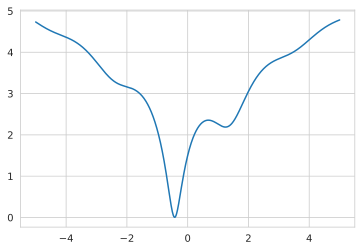

In [75]:
#@title **Objective Function** { display-mode: "form" }
def f(x):
  return jnp.log((x)**2 + 1.0 + jnp.sin(x*3)) + 1.5

xs = jnp.linspace(-5, 5, 1000)
plt.plot(xs, jax.vmap(f)(xs))
plt.show()

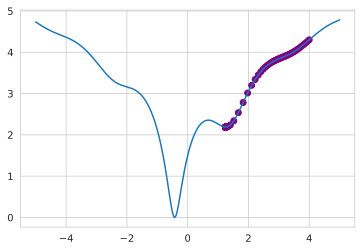

First Derivative: 4.76837158203125e-07
Second Derivative: 3.5279316902160645


In [7]:
#@title **Solver** { display-mode: "form" }
results = []                    # Logging
lr = 0.1                        # Learning Rate 
params = 4.0                    # Initialization
step = gradient_descent(f, lr)
for i in range(100):
  results.append(params)
  params = step(params)

result_array = jnp.array([results])
ys = jax.vmap(f)(result_array)
xs = jnp.linspace(-5, 5, 1000)
plt.plot(xs, jax.vmap(f)(xs))
plt.scatter(result_array, ys, color='purple')
plt.show()
print(f"First Derivative: {jax.grad(f)(params)}")
print(f"Second Derivative: {jax.grad(jax.grad(f))(params)}")

In [54]:
#@title **Gradient Descent With Momentum** { display-mode: "form" }
def gradient_descent_with_momentum(f, a):
  """Returns a compiled function""" #Don't worry about this if you haven't heard of it before
  @jax.jit
  def update(z):
    x, search_direction = z
    search_direction = -jax.grad(f)(x) + 0.72*search_direction
    return (x + a*search_direction, search_direction)
  return update

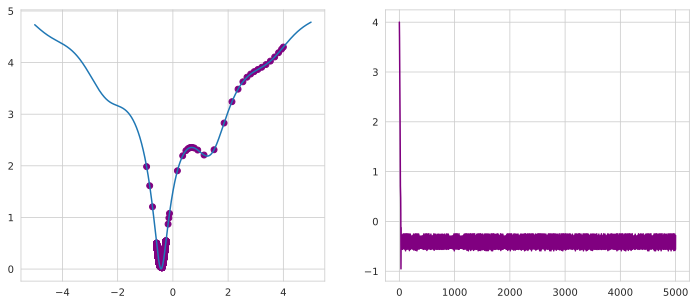

In [61]:
#@title **Solver** { display-mode: "form" }
results = []                    # Logging
lr = 0.1                        # Learning Rate 
params = (4.0, 0)                    # Initialization
step = gradient_descent_with_momentum(f, lr)
for i in range(5000):
  results.append(params[0])
  params = step(params)

result_array = jnp.array([results]).reshape(-1,)
ys = jax.vmap(f)(result_array)
xs = jnp.linspace(-5, 5, 1000)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax1.plot(xs, jax.vmap(f)(xs))
ax1.scatter(result_array, ys, color='purple')
ax2.plot(jnp.arange(len(result_array)), result_array, color='purple')
plt.show()

In [76]:
def solver(f, lr, n, key):
  (params, _), _ = jax.lax.scan( gradient_descent_with_momentum(f, lr), (jax.random.normal(key), 0.), xs=None, length=n)
  return params